# Proyecto del Día 14 - Gestión Segura de Datos de Clientes (solución)

Este notebook implementa un sistema básico de gestión y análisis de datos de clientes, aplicando técnicas de pseudonimización, anonimización y balanceo de datos.


## Objetivo
El proyecto consiste en desarrollar un sistema de gestión y análisis de datos de clientes que implemente técnicas de pseudonimización, anonimización y balanceo de datos para proteger la privacidad de los usuarios y asegurar un análisis equitativo.


## Consignas del Proyecto
1. Cargar los datos de clientes provistos en un archivo CSV.
2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.
3. Aplicar técnicas de pseudonimización al campo `nombre`.
4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.
5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.


Este proyecto te permitirá aplicar prácticas esenciales de privacidad de datos y técnicas de manipulación de datos en un entorno práctico, preparándote para desafíos similares en entornos profesionales.

¡Mucha suerte y que te diviertas!

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [2]:
# Cargar los datos en el dataframe
ruta = "C:/Users/Federico/Downloads/Python DS/Día 14/8 - Proyecto del Día 14/clientes.csv"
df = pd.read_csv(ruta)
df.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


In [3]:
# Anonimizar el campo dirección a través de la eliminación
df.drop('direccion', axis=1, inplace=True)
df.head()

,nombre,edad,categoria,salario
0,Richard Martin,62,0,61050
1,James Jones,65,1,53824
2,Patricia Wilson,18,0,60281
3,Elizabeth Robinson,21,1,42187
4,Charles Brown,21,1,37589


In [4]:
# Anonimizar el campo edad a través del redondeo
df['edad'] = (df['edad'] // 10) * 10
df

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61050
1,James Jones,60,1,53824
2,Patricia Wilson,10,0,60281
3,Elizabeth Robinson,20,1,42187
4,Charles Brown,20,1,37589
...,...,...,...,...
195,Barbara Jones,40,0,51931
196,Richard Brown,30,1,47712
197,Mary Garcia,60,1,45261
198,James Wilson,40,1,46787


In [5]:
# Anonimizar el campo salario a través de la agregación de ruido
ruido = np.random.normal(0, 100, size=df['salario'].shape)
df['salario'] += ruido
df

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61081.125687
1,James Jones,60,1,53978.373257
2,Patricia Wilson,10,0,60263.066772
3,Elizabeth Robinson,20,1,42183.066568
4,Charles Brown,20,1,37581.809883
...,...,...,...,...
195,Barbara Jones,40,0,51906.460225
196,Richard Brown,30,1,47652.725064
197,Mary Garcia,60,1,45210.935042
198,James Wilson,40,1,46587.757775


In [6]:
# Pseudonimizar el campo nombre
for i in range(len(df)):
    df.loc[i, 'nombre'] = 'Cliente' + str(i)
df.head()

,nombre,edad,categoria,salario
0,Cliente0,60,0,61081.125687
1,Cliente1,60,1,53978.373257
2,Cliente2,10,0,60263.066772
3,Cliente3,20,1,42183.066568
4,Cliente4,20,1,37581.809883


In [7]:
# Balancear los datos de categorías
agrupado = df.groupby('categoria')

df_balanceado = pd.DataFrame()

for nombre, grupo in agrupado:
    grupo_balanceado = resample(grupo,
                              replace=True,
                              n_samples=100,
                              random_state=123)
    df_balanceado = pd.concat([df_balanceado, grupo_balanceado])

df_balanceado

,nombre,edad,categoria,salario
158,Cliente158,50,0,41541.651168
42,Cliente42,30,0,59376.385427
194,Cliente194,40,0,49775.731234
133,Cliente133,50,0,41880.530297
114,Cliente114,60,0,53443.917158
...,...,...,...,...
179,Cliente179,40,1,54278.374567
80,Cliente80,10,1,56423.886054
93,Cliente93,50,1,49429.514142
156,Cliente156,50,1,48050.411518


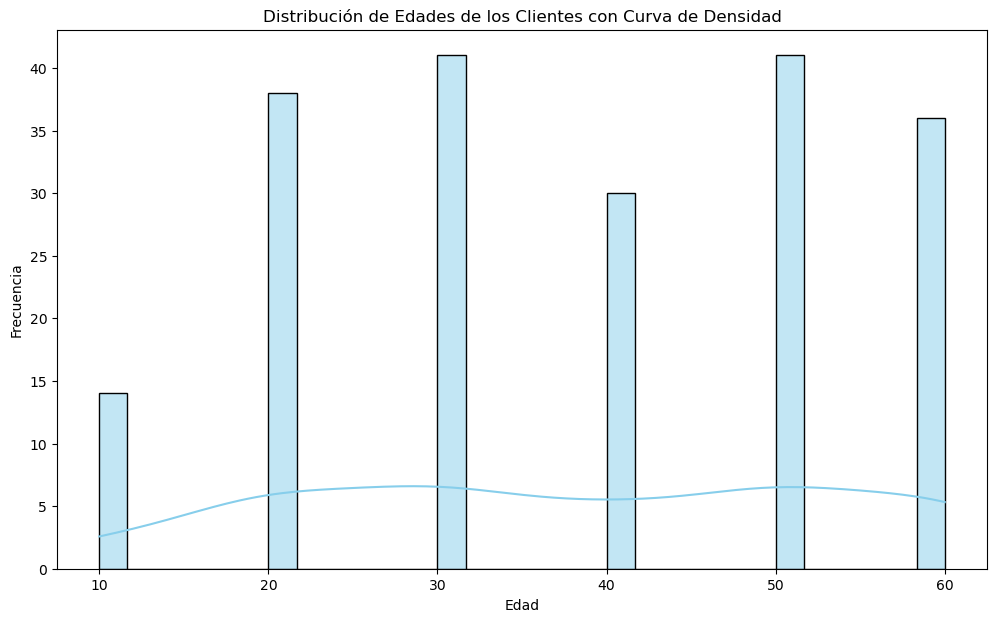

In [8]:
# Visualización 1: Distribución de las edades con curva de densidad
plt.figure(figsize=(12, 7))
ax = sns.histplot(df['edad'],
                  kde=True,
                  color='skyblue',
                  bins=30)
ax.set(title='Distribución de Edades de los Clientes con Curva de Densidad',
       xlabel='Edad',
       ylabel='Frecuencia');

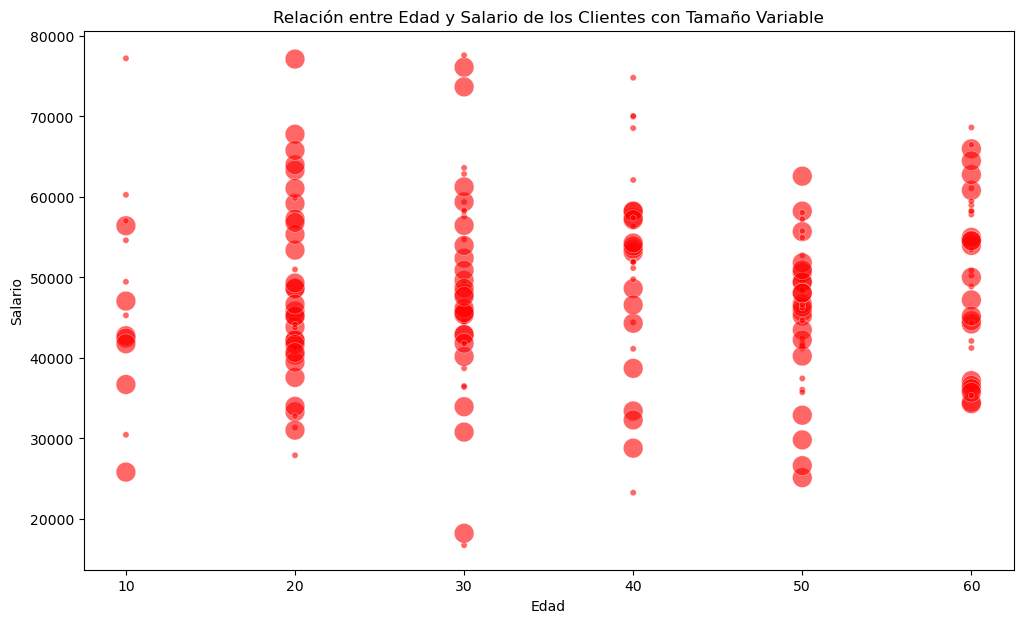

In [9]:
# Visualización 2: Relación entre Edad y Salario con tamaño variable
plt.figure(figsize=(12, 7))
sizes = df['categoria'].replace({0: 50, 1: 100})  # Asignar tamaño según categoría para ilustrar
scatter = sns.scatterplot(x='edad',
                          y='salario',
                          size=sizes,
                          legend=False,
                          sizes=(20, 200),
                          data=df,
                          color='red',
                          alpha=0.6)
scatter.set(title='Relación entre Edad y Salario de los Clientes con Tamaño Variable',
            xlabel='Edad',
            ylabel='Salario');

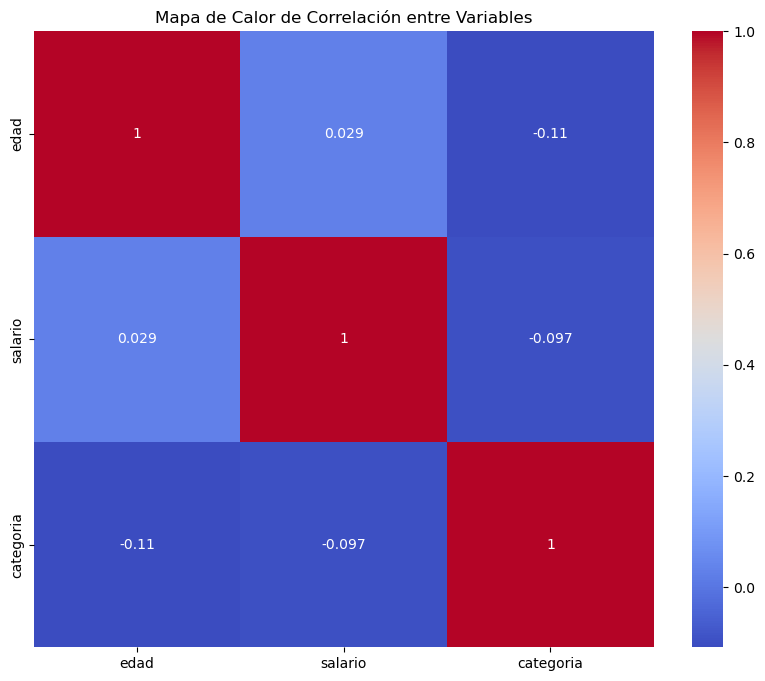

In [10]:
# Visualización 3: Mapa de Calor de Correlación entre Variables
plt.figure(figsize=(10, 8))
# Calculamos la matriz de correlación
correlation_matrix = df[['edad', 'salario', 'categoria']].corr()
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='coolwarm')
heatmap.set(title='Mapa de Calor de Correlación entre Variables');